In [1]:
import random

data = []
for i in range(10):
    volume = random.randint(0, 100)
    speed = random.uniform(0, 60)
    status = i % 2  # alternates between 0 and 1
    data.append((volume, speed, status))

states = set(data)
print(states)

{(7, 49.007910004142964, 1), (45, 4.286929468675506, 1), (85, 10.299380464265731, 0), (25, 51.62808962157055, 0), (12, 16.008866736111806, 1), (24, 49.253901620546344, 0), (46, 9.080371750816177, 0), (78, 6.5243805327069, 0), (71, 9.666676800952402, 1), (97, 34.52308310959424, 1)}


In [2]:
# Define the actions
actions = {'green for NS direction', 'green for EW direction'}

print(actions)

{'green for NS direction', 'green for EW direction'}


In [3]:
# Define the transition probabilities
transitions = {}
for state in states:
    for action in actions:
        # Calculate the possible next states
        next_states = []
        if action == 'green for NS direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[0] >= state[0] and next_state[2] == 0:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            # Add the transition probability to the dictionary
            transitions[(state, action, next_state)] = p
        elif action == 'green for EW direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[1] >= state[1] and next_state[2] == 1:
                    next_states.append(next_state)
            p = 1.0 / len(next_states) if len(next_states) > 0 else 0
            # Add the transition probability to the dictionary
            transitions[(state, action, next_state)] = p

print(transitions)

{((7, 49.007910004142964, 1), 'green for NS direction', (97, 34.52308310959424, 1)): 0.2, ((7, 49.007910004142964, 1), 'green for EW direction', (97, 34.52308310959424, 1)): 1.0, ((45, 4.286929468675506, 1), 'green for NS direction', (97, 34.52308310959424, 1)): 0.3333333333333333, ((45, 4.286929468675506, 1), 'green for EW direction', (97, 34.52308310959424, 1)): 0.2, ((85, 10.299380464265731, 0), 'green for NS direction', (97, 34.52308310959424, 1)): 1.0, ((85, 10.299380464265731, 0), 'green for EW direction', (97, 34.52308310959424, 1)): 0.3333333333333333, ((25, 51.62808962157055, 0), 'green for NS direction', (97, 34.52308310959424, 1)): 0.25, ((25, 51.62808962157055, 0), 'green for EW direction', (97, 34.52308310959424, 1)): 0, ((12, 16.008866736111806, 1), 'green for NS direction', (97, 34.52308310959424, 1)): 0.2, ((12, 16.008866736111806, 1), 'green for EW direction', (97, 34.52308310959424, 1)): 0.3333333333333333, ((24, 49.253901620546344, 0), 'green for NS direction', (97, 

In [4]:
# Define the rewards
rewards = {}
for state in states:
    for action in actions:
        # Calculate the possible next states
        next_states = []
        if action == 'green for NS direction':
            # Calculate the probability of transitioning to each possible next state
            # Checks if the next state is reachable from the current state by moving North-South 
            #and the intersection is not currently allowing East-West traffic to pass through.
            for next_state in states:
                if next_state[0] >= state[0] and next_state[2] == 0:
                    next_states.append(next_state)
            # Define the reward for each possible next state
            for next_state in next_states:
                r = 10
                if next_state[2] == 1:
                    r -= 10
                r -= next_state[0] * 0.1
                r -= next_state[1] * 0.01
                # Add the reward to the dictionary
                rewards[(state, action, next_state)] = r
        elif action == 'green for EW direction':
            # Calculate the probability of transitioning to each possible next state
            for next_state in states:
                if next_state[1] >= state[1] and next_state[2] == 1:
                    next_states.append(next_state)
            # Define the reward for each possible next state
            for next_state in next_states:
                r = 10
                if next_state[2] == 0:
                    r -= 10
                r -= next_state[0] * 0.1
                r -= next_state[1] * 0.01
                # Add the reward to the dictionary
                rewards[(state, action, next_state)] = r

print(rewards)

{((7, 49.007910004142964, 1), 'green for NS direction', (85, 10.299380464265731, 0)): 1.3970061953573427, ((7, 49.007910004142964, 1), 'green for NS direction', (25, 51.62808962157055, 0)): 6.983719103784295, ((7, 49.007910004142964, 1), 'green for NS direction', (24, 49.253901620546344, 0)): 7.107460983794536, ((7, 49.007910004142964, 1), 'green for NS direction', (46, 9.080371750816177, 0)): 5.309196282491838, ((7, 49.007910004142964, 1), 'green for NS direction', (78, 6.5243805327069, 0)): 2.13475619467293, ((7, 49.007910004142964, 1), 'green for EW direction', (7, 49.007910004142964, 1)): 8.809920899958572, ((45, 4.286929468675506, 1), 'green for NS direction', (85, 10.299380464265731, 0)): 1.3970061953573427, ((45, 4.286929468675506, 1), 'green for NS direction', (46, 9.080371750816177, 0)): 5.309196282491838, ((45, 4.286929468675506, 1), 'green for NS direction', (78, 6.5243805327069, 0)): 2.13475619467293, ((45, 4.286929468675506, 1), 'green for EW direction', (7, 49.00791000414

In [5]:
# Define the discount factor and convergence threshold
gamma = 0.8
convergence_threshold = 0.0001

In [6]:
# Value iteration algorithm
V = {state: 0 for state in states}
while True:
    delta = 0
    for state in states:
        v = V[state]
        max_value = float('-inf')
        for action in actions:
            action_value = 0
            for next_state, probability in transitions.get((state, action), {}).items():
                action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
            if action_value > max_value:
                max_value = action_value
                best_action = action
        V[state] = max_value
        delta = max(delta, abs(v - V[state]))
    if delta < convergence_threshold:
        break

# Extract the optimal policy
policy = {}
for state in states:
    max_value = float('-inf')
    for action in actions:
        action_value = 0
        for next_state, probability in transitions.get((state, action), {}).items():
            action_value += probability * (rewards.get((state, action, next_state), 0) + gamma * V[next_state])
        if action_value > max_value:
            max_value = action_value
            best_action = action
    policy[state] = best_action

print(policy)

{(7, 49.007910004142964, 1): 'green for NS direction', (45, 4.286929468675506, 1): 'green for NS direction', (85, 10.299380464265731, 0): 'green for NS direction', (25, 51.62808962157055, 0): 'green for NS direction', (12, 16.008866736111806, 1): 'green for NS direction', (24, 49.253901620546344, 0): 'green for NS direction', (46, 9.080371750816177, 0): 'green for NS direction', (78, 6.5243805327069, 0): 'green for NS direction', (71, 9.666676800952402, 1): 'green for NS direction', (97, 34.52308310959424, 1): 'green for NS direction'}


In [7]:
import pandas as pd

# Create a DataFrame to represent the optimal policy
df = pd.DataFrame(index=range(10), columns=['Volume', 'Speed', 'Status', 'Optimal Action'])
for i, state in enumerate(states):
    df.loc[i, 'Volume'] = state[0]
    df.loc[i, 'Speed'] = state[1]
    df.loc[i, 'Status'] = 'NS' if state[2] == 0 else 'EW'
    df.loc[i, 'Optimal Action'] = policy[state]

print(df)

  Volume      Speed Status          Optimal Action
0      7   49.00791     EW  green for NS direction
1     45   4.286929     EW  green for NS direction
2     85   10.29938     NS  green for NS direction
3     25   51.62809     NS  green for NS direction
4     12  16.008867     EW  green for NS direction
5     24  49.253902     NS  green for NS direction
6     46   9.080372     NS  green for NS direction
7     78   6.524381     NS  green for NS direction
8     71   9.666677     EW  green for NS direction
9     97  34.523083     EW  green for NS direction


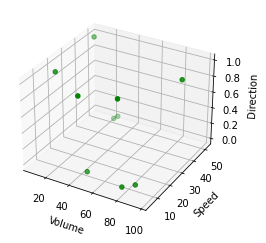

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the data from the DataFrame
x = df['Volume']
y = df['Speed']
z = [0 if s == 'NS' else 1 for s in df['Status']]  # Convert direction to a numerical value (0 or 1)
colors = ['green' if a == 'green for NS direction' else 'red' for a in df['Optimal Action']]  # Color based on optimal action

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors)

# Set the axis labels
ax.set_xlabel('Volume')
ax.set_ylabel('Speed')
ax.set_zlabel('Direction')

plt.show()


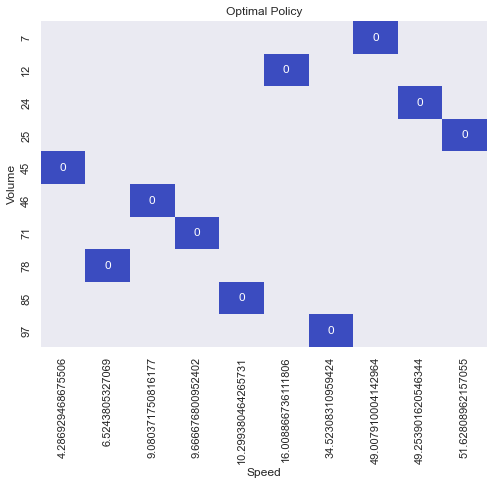

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to represent the optimal policy
df = pd.DataFrame(index=range(10), columns=['Volume', 'Speed', 'Status', 'Optimal Action'])
for i, state in enumerate(states):
    df.loc[i, 'Volume'] = state[0]
    df.loc[i, 'Speed'] = state[1]
    df.loc[i, 'Status'] = 'NS' if state[2] == 0 else 'EW'
    df.loc[i, 'Optimal Action'] = policy[state]

# Map the actions to numeric values for the heatmap
action_map = {'green for NS direction': 0, 'green for EW direction': 1}
df['Optimal Action'] = df['Optimal Action'].map(action_map)

# Create a pivot table to prepare the data for the heatmap
pivot = df.pivot('Volume', 'Speed', 'Optimal Action')

# Create the heatmap using Seaborn
sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, cbar=False)
plt.title('Optimal Policy')
plt.show()
